(1) 데이터 불러오기: ImageDataGenerator (train, test)


In [1]:
import os
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical, normalize



(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

print(x_train.max(), x_train.min())

170498071/170498071 [==============================] - 5s 0us/step
255 0


(2) 데이터 전처리: /255  

In [2]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('x_train:',x_train.shape, 'x_test:',x_test.shape)
print('y_train:',y_train.shape, 'y_test:',y_test.shape)
print(x_train.max(), x_train.min(), x_test.max(), x_test.min())

train_datagen = ImageDataGenerator(
    rotation_range = 45,
    width_shift_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

train_datagen.fit(x_train)

train_generator = train_datagen.flow(
    x_train,
    y_train,
    batch_size = 64)


x_train: (50000, 32, 32, 3) x_test: (10000, 32, 32, 3)
y_train: (50000, 10) y_test: (10000, 10)
1.0 0.0 1.0 0.0


(3) 신경망모델 라이브러리 불러오기

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

(4) 기본 신경망 모델

In [ ]:
#vgg model
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(input_shape = (32,32,3), filters = 64, kernel_size= (3,3), strides= (1,1), activation= 'relu', padding = 'same'))
model.add(tf.keras.layers.Conv2D(filters= 64, kernel_size= (3,3), strides= (1,1), activation= 'relu', padding= 'same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size= (2,2)))

model.add(tf.keras.layers.Conv2D(filters= 128, kernel_size= (3,3), strides= (1,1), activation= 'relu', padding= 'same'))
model.add(tf.keras.layers.Conv2D(filters= 128, kernel_size= (3,3), strides= (1,1), activation= 'relu', padding= 'same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size= (2,2)))

model.add(tf.keras.layers.Conv2D(filters= 256, kernel_size= (3,3), strides= (1,1), activation= 'relu', padding= 'same'))
model.add(tf.keras.layers.Conv2D(filters= 256, kernel_size= (3,3), strides= (1,1), activation= 'relu', padding= 'same'))
model.add(tf.keras.layers.Conv2D(filters= 256, kernel_size= (3,3), strides= (1,1), activation= 'relu', padding= 'same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size= (2,2)))

model.add(tf.keras.layers.Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), activation= 'relu', padding= 'same'))
model.add(tf.keras.layers.Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), activation= 'relu', padding= 'same'))
model.add(tf.keras.layers.Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), activation= 'relu', padding= 'same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size= (2,2)))


model.add(tf.keras.layers.Conv2D(filters= 1024, kernel_size= (3,3), strides= (1,1), activation= 'relu', padding= 'same'))
model.add(tf.keras.layers.Conv2D(filters= 1024, kernel_size= (3,3), strides= (1,1), activation= 'relu', padding= 'same'))
model.add(tf.keras.layers.Conv2D(filters= 1024, kernel_size= (3,3), strides= (1,1), activation= 'relu', padding= 'same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size= (2,2)))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(4096, activation='relu'))
model.add(tf.keras.layers.Dense(4096, activation='relu'))
model.add(tf.keras.layers.Dense(10 , activation='softmax'))









(5) compile 설정

In [ ]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                 

(6) fit (학습 진행) (validation_split=0.1)

In [ ]:
history = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_valid, y_valid))

Epoch 1/50
704/704 [==============================] - 47s 64ms/step - loss: 2.3025 - accuracy: 0.1012 - val_loss: 2.3023 - val_accuracy: 0.0932
Epoch 2/50
704/704 [==============================] - 44s 62ms/step - loss: 2.3020 - accuracy: 0.1061 - val_loss: 2.3017 - val_accuracy: 0.0932
Epoch 3/50
704/704 [==============================] - 44s 62ms/step - loss: 2.3003 - accuracy: 0.1354 - val_loss: 2.2980 - val_accuracy: 0.1912
Epoch 4/50
704/704 [==============================] - 45s 64ms/step - loss: 2.2832 - accuracy: 0.1843 - val_loss: 2.2355 - val_accuracy: 0.1578
Epoch 5/50
704/704 [==============================] - 45s 63ms/step - loss: 2.1385 - accuracy: 0.1995 - val_loss: 2.0982 - val_accuracy: 0.2058
Epoch 6/50
704/704 [==============================] - 44s 63ms/step - loss: 2.0396 - accuracy: 0.2440 - val_loss: 2.0208 - val_accuracy: 0.2428
Epoch 7/50
704/704 [==============================] - 44s 63ms/step - loss: 1.9765 - accuracy: 0.2709 - val_loss: 2.4213 - val_accuracy:

(7) acc와 val acc 그래프 그리기


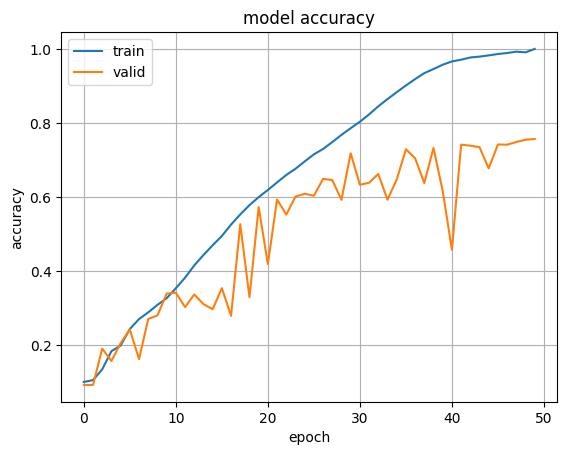

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='best')
plt.grid()
plt.show()

(8) loss와 val loss그래프 그리기

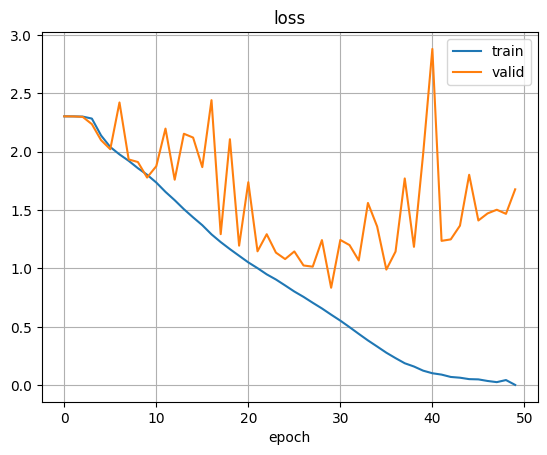

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='best')
plt.grid()
plt.show()

(9) test data evaluate

In [ ]:
result=model.evaluate(x_test, y_test)
print('vgg 기본 모델 결과:',result)

313/313 [==============================] - 5s 13ms/step - loss: 1.6224 - accuracy: 0.7629
vgg 기본 모델 결과: [1.6224433183670044, 0.7628999948501587]


(10) 신경망 모델 설정하기(batch normalization, dropout)

In [23]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(input_shape = (32,32,3), filters = 64, kernel_size= (3,3), strides= (1,1), activation= 'relu', padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters= 64, kernel_size= (3,3), strides= (1,1), activation= 'relu', padding= 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.MaxPooling2D(pool_size= (2,2)))

model.add(tf.keras.layers.Conv2D(filters= 128, kernel_size= (3,3), strides= (1,1), activation= 'relu', padding= 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters= 128, kernel_size= (3,3), strides= (1,1), activation= 'relu', padding= 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.MaxPooling2D(pool_size= (2,2)))

model.add(tf.keras.layers.Conv2D(filters= 256, kernel_size= (3,3), strides= (1,1), activation= 'relu', padding= 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters= 256, kernel_size= (3,3), strides= (1,1), activation= 'relu', padding= 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters= 256, kernel_size= (3,3), strides= (1,1), activation= 'relu', padding= 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.MaxPooling2D(pool_size= (2,2)))

model.add(tf.keras.layers.Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), activation= 'relu', padding= 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), activation= 'relu', padding= 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), activation= 'relu', padding= 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.MaxPooling2D(pool_size= (2,2)))

model.add(tf.keras.layers.Conv2D(filters= 1024, kernel_size= (3,3), strides= (1,1), activation= 'relu', padding= 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters= 1024, kernel_size= (3,3), strides= (1,1), activation= 'relu', padding= 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters= 1024, kernel_size= (3,3), strides= (1,1), activation= 'relu', padding= 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.MaxPooling2D(pool_size= (2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(4096, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(4096, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


compile하기

In [24]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy', metrics=['acc'])


model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_15 (Ba  (None, 32, 32, 64)        256       
 tchNormalization)                                               
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_16 (Ba  (None, 32, 32, 64)        256       
 tchNormalization)                                               
                                                                 
 dropout_6 (Dropout)         (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 16, 64)       

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.1, random_state=123)

print('train data:', x_train.shape, y_train.shape)
print('valid data:', x_valid.shape, y_valid.shape)
print('test data:', x_test.shape, y_test.shape)


train data: (40500, 32, 32, 3) (40500, 10)
valid data: (4500, 32, 32, 3) (4500, 10)
test data: (10000, 32, 32, 3) (10000, 10)


fit 학습 진행

In [26]:
history = model.fit(x_train, y_train, batch_size=256, epochs=50, validation_data=(x_valid, y_valid))

Epoch 1/50
159/159 [==============================] - 44s 223ms/step - loss: 2.3005 - acc: 0.2796 - val_loss: 2.7550 - val_acc: 0.0987
Epoch 2/50
159/159 [==============================] - 32s 202ms/step - loss: 1.7162 - acc: 0.4097 - val_loss: 2.8447 - val_acc: 0.1640
Epoch 3/50
159/159 [==============================] - 31s 194ms/step - loss: 1.4886 - acc: 0.4775 - val_loss: 3.0345 - val_acc: 0.2329
Epoch 4/50
159/159 [==============================] - 31s 197ms/step - loss: 1.3281 - acc: 0.5336 - val_loss: 1.8313 - val_acc: 0.4160
Epoch 5/50
159/159 [==============================] - 31s 196ms/step - loss: 1.2006 - acc: 0.5773 - val_loss: 1.6149 - val_acc: 0.4780
Epoch 6/50
159/159 [==============================] - 32s 198ms/step - loss: 1.1055 - acc: 0.6129 - val_loss: 1.4818 - val_acc: 0.5158
Epoch 7/50
159/159 [==============================] - 32s 199ms/step - loss: 0.9999 - acc: 0.6493 - val_loss: 1.2152 - val_acc: 0.5813
Epoch 8/50
159/159 [==============================] - 3

acc와 val acc 그래프(batch size: 256, epoch: 50)

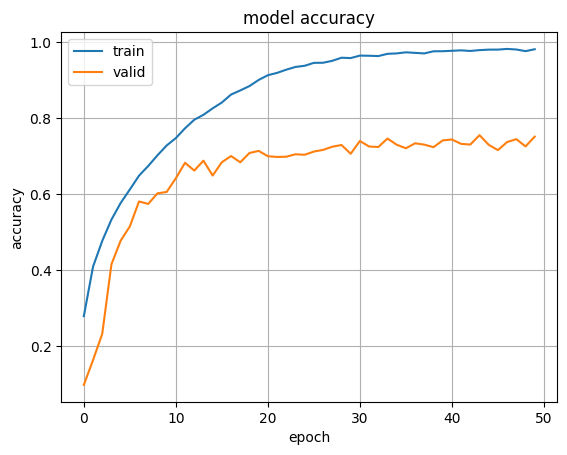

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='best')
plt.grid()
plt.show()

loss와 val loss그래프(batch size: 256, epoch:50)

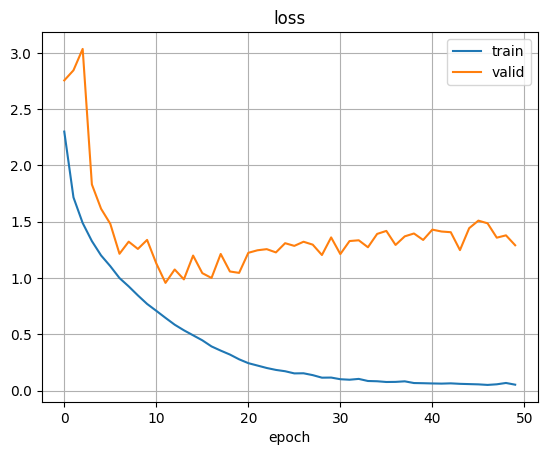

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='best')
plt.grid()
plt.show()


acc와 val acc그래프(batch size: 64, epoch: 50)


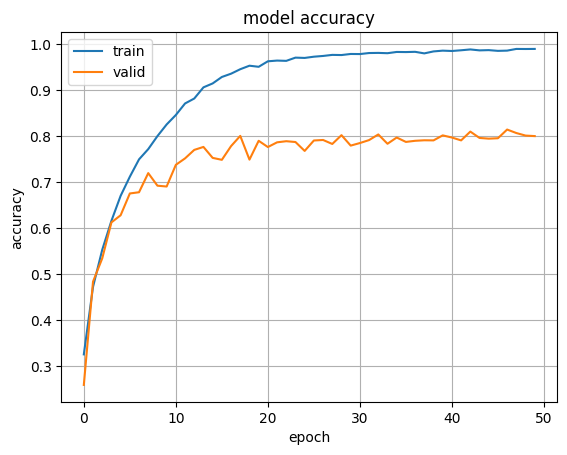

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='best')
plt.grid()
plt.show()

In [39]:
result=model.evaluate(x_test, y_test)
print('최종 모델 결과(batchsize:256, epoch:50):',result)

313/313 [==============================] - 4s 14ms/step - loss: 1.3266 - acc: 0.7508
최종 모델 결과(batchsize:256, epoch:50): [1.3265538215637207, 0.7508000135421753]


loss와 val loss그래프

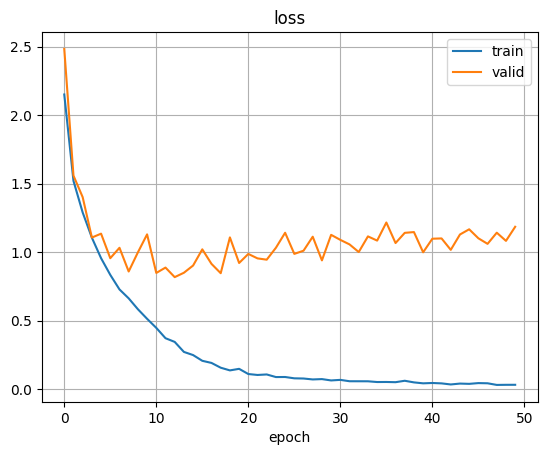

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='best')
plt.grid()
plt.show()

test data evaluate

In [ ]:
result=model.evaluate(x_test, y_test)
print('신경망 모델 설정한 결과:',result)

313/313 [==============================] - 4s 13ms/step - loss: 1.1405 - acc: 0.7956
신경망 모델 설정한 결과: [1.1404837369918823, 0.7955999970436096]


batch size 조정하기

In [7]:
history1 = model.fit(x_train, y_train, batch_size=32, epochs=30, validation_data=(x_valid, y_valid))
history2 = model.fit(x_train, y_train, batch_size=64, epochs=30, validation_data=(x_valid, y_valid))
history3 = model.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_valid, y_valid))
history4 = model.fit(x_train, y_train, batch_size=256, epochs=30, validation_data=(x_valid, y_valid))



Epoch 1/30
1407/1407 [==============================] - 108s 62ms/step - loss: 2.0413 - acc: 0.3535 - val_loss: 1.6249 - val_acc: 0.4480
Epoch 2/30
1407/1407 [==============================] - 86s 61ms/step - loss: 1.4303 - acc: 0.5116 - val_loss: 1.4866 - val_acc: 0.5182
Epoch 3/30
1407/1407 [==============================] - 86s 61ms/step - loss: 1.1678 - acc: 0.6049 - val_loss: 1.2674 - val_acc: 0.5780
Epoch 4/30
1407/1407 [==============================] - 88s 63ms/step - loss: 0.9937 - acc: 0.6701 - val_loss: 1.0091 - val_acc: 0.6556
Epoch 5/30
1407/1407 [==============================] - 87s 62ms/step - loss: 0.8539 - acc: 0.7166 - val_loss: 0.8905 - val_acc: 0.7056
Epoch 6/30
1407/1407 [==============================] - 87s 62ms/step - loss: 0.7262 - acc: 0.7596 - val_loss: 0.8264 - val_acc: 0.7258
Epoch 7/30
1407/1407 [==============================] - 87s 62ms/step - loss: 0.6521 - acc: 0.7840 - val_loss: 0.7358 - val_acc: 0.7570
Epoch 8/30
1407/1407 [=========================

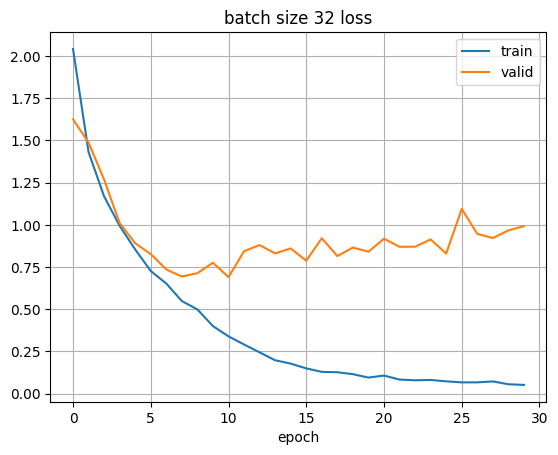

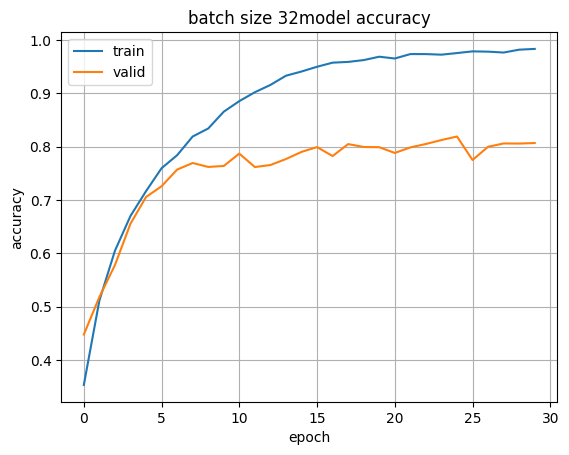

In [38]:
#batch 32
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('batch size 32 loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='best')
plt.grid()
plt.show()
import matplotlib.pyplot as plt

plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('batch size 32model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='best')
plt.grid()
plt.show()

(9) acc와 val acc그래프 그리기

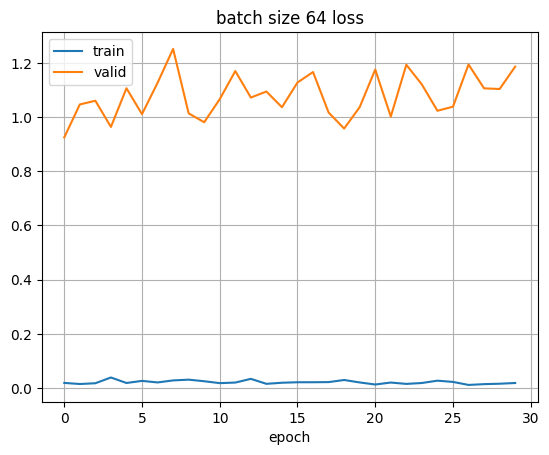

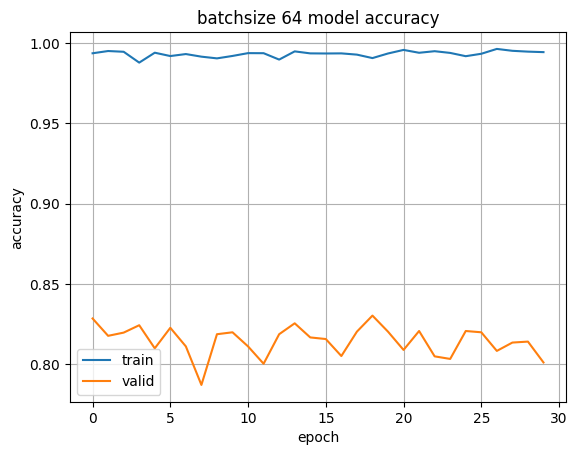

In [37]:

#batch size 64
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('batch size 64 loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='best')
plt.grid()
plt.show()
import matplotlib.pyplot as plt

plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('batchsize 64 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='best')
plt.grid()
plt.show()

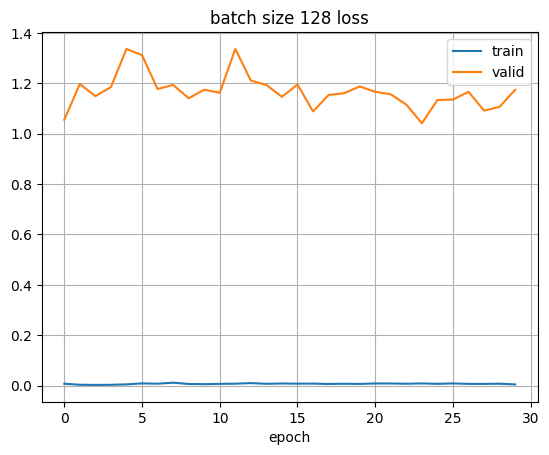

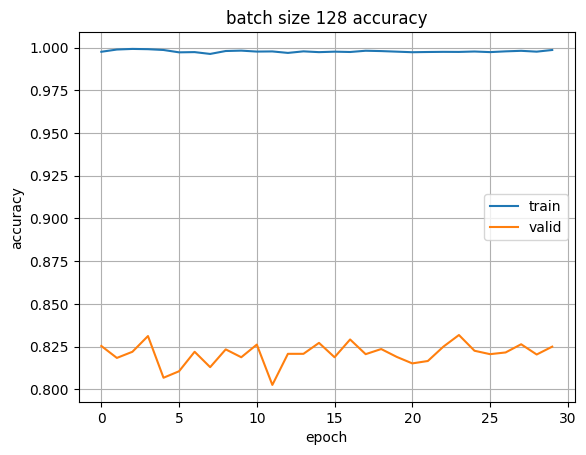

In [35]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('batch size 128 loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='best')
plt.grid()
plt.show()
import matplotlib.pyplot as plt

plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.title('batch size 128 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='best')
plt.grid()
plt.show()

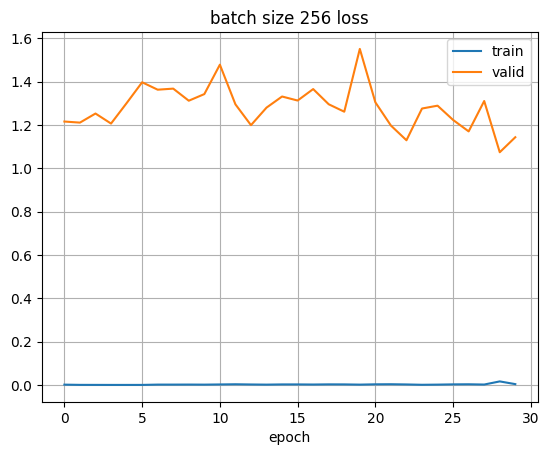

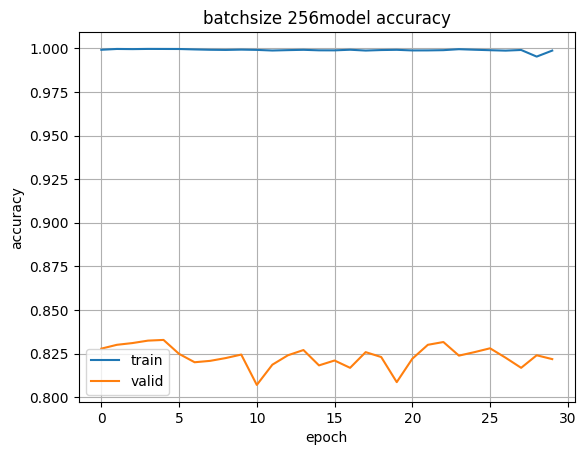

In [36]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('batch size 256 loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='best')
plt.grid()
plt.show()
import matplotlib.pyplot as plt

plt.plot(history4.history['acc'])
plt.plot(history4.history['val_acc'])
plt.title('batchsize 256model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='best')
plt.grid()
plt.show()